In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
def convert_RGB_to_monochrome_BW(image_1,threshold=100):
    img_1=image_1
    img_2=np.zeros((img_1.shape[0],img_1.shape[1]))
    for i in range(img_2.shape[0]):
        for j in range(img_2.shape[1]):
            if(img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,1]/3)>threshold:
                img_2[i,j]=0
            else:
                img_2[i,j]=1
    return img_2

In [26]:
def m_f_0_and(l1,l2):
    n=len(l1)
    s=[]
    for i in range(n):
        a=l1[i] and l2[i]
        s.append(a)
    return s
def m_f_1_AND_or_OR(l1,operator=0):
    if operator :
        if 1 in l1:
            s1=1
        else:
            s1=0
    else:
        if 0 in l1:
            s1=0
        else:
            s1=1       
    return s1
def m_f_2_combine(l1,l2,op=0):
    a=m_f_0_and(l1,l2)
    return m_f_1_AND_or_OR(a,op)

In [14]:
list_1=[0,0,1,0,1] #mask
list_2=[1,1,1,1,1] #block
m_f_2_combine(list_1,list_2,1)

1

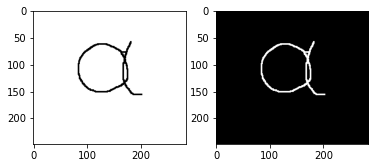

In [30]:
path_file=r"C:\Users\W10\Pictures\Adsız.png"
img_1=plt.imread(path_file)
img_2=convert_RGB_to_monochrome_BW(img_1,0.5)
plt.subplot(1,2,1),plt.imshow(img_1,cmap='gray')
plt.subplot(1,2,2),plt.imshow(img_2,cmap='gray')
plt.show()

In [20]:
img_1.shape

(248, 284, 3)

In [22]:
np.max(img_1)

1.0

In [28]:
img_2

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [42]:
def define_mask1():
    mask_1=[[1,1,1],[1,1,1],[1,1,1]]
    return mask_1

def define_mask2():
    mask_1=[[0,0,0],[0,0,0],[0,0,0]]
    mask,mask[1][2],mask[0][0],mask[2][2]
    for i in range(3):
        for j in range(3):
            print(mask[i][j],end=" ")
        print()
    return mask_1
def my_dilation(img1,mask):
    m=img1.shape[0] #100
    n=img1.shape[1] #100
    img2=np.zeros((m,n),dtype='uint8')
    for i in range(1,m-1): #padding
        for j in range(1,n-1):
            
            x1=img1[i,j] == mask[1][1]
            
            x2=img1[i-1,j-1] == mask[0][0]
            x3=img1[i-1,j] == mask[0][1]
            x4=img1[i-1,j+1] == mask[0][2]
            
            x5=img1[i+1,j-1] == mask[2][0]
            x6=img1[i+1,j] == mask[2][1]
            x7=img1[i+1,j+1] == mask[2][2]
            
            x8=img1[i,j-1] == mask[1][0]
            x9=img1[i,j+1] == mask[1][2]
            
            result_1=x1 or x2 or x3 or x4 or x5
            result_2=x6 or x7 or x8 or x9
            
            result=result_1 or result_2 
            
            img2[i,j]=result
    return img2

In [43]:
img_3=my_dilation(img_2,define_mask1())
img_4=my_dilation(img_3,define_mask1())
img_5=my_dilation(img_4,define_mask1())

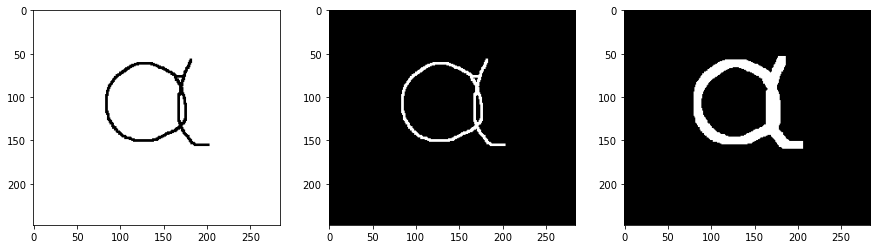

In [44]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img_1)
plt.subplot(1,3,2),plt.imshow(img_2,cmap='gray')
plt.subplot(1,3,3),plt.imshow(img_5,cmap='gray')
plt.show()